In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
optimization_df = pd.read_csv("charity_data.csv")
optimization_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# optimization_df.drop(['EIN', 'NAME'], axis = 1, inplace=True)
optimization_df.drop(['EIN'], axis = 1, inplace=True)
optimization_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
optimization_cat = optimization_df.dtypes[optimization_df.dtypes == "object"].index.tolist()
optimization_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Optimization atttempts
# optimization_df.drop(['SPECIAL_CONSIDERATIONS', 'STATUS'], axis = 1, inplace=True)
# optimization_df.drop(['SPECIAL_CONSIDERATIONS', 'STATUS', 'APPLICATION_TYPE', 'CLASSIFICATION'], axis = 1, inplace=True)
# optimization_df

In [5]:
# Look at NAME value counts for binning
name_counts = optimization_df.NAME.value_counts()
#  How many name counts are greater than 5?
name_counts[name_counts>5]

PARENT BOOSTER USA INC                                             1260
TOPS CLUB INC                                                       765
UNITED STATES BOWLING CONGRESS INC                                  700
WASHINGTON STATE UNIVERSITY                                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                     408
                                                                   ... 
JACKSONVILLE DISTRICT COUNCIL SOCIETY OF ST VINCENT DE PAUL INC       6
OLD OAK CLIFF CONSERVATION LEAGUE INC                                 6
NATIONAL CHARITY LEAGUE INC                                           6
HABITAT FOR HUMANITY INTERNATIONAL                                    6
MENNONITE DISASTER SERVICE                                            6
Name: NAME, Length: 354, dtype: int64

In [6]:
#  How many name counts are less than or equal to 5?
name_counts[name_counts <= 5]

INTERNATIONL TRANSPLANT NURSES SOCIETY                           5
DEPARTMENT OF NEVADA VETERANS OF FOREIGN WARS OF THE US INC      5
ROYAL ORDER OF JESTERS                                           5
COUNTRY DANCE AND SONG SOCIETY INC                               5
COUNTRY DANCE & SONG SOCIETY INC                                 5
                                                                ..
YES SOCIETY                                                      1
PAGE MIDDLE SCHOOL PARENT TEACHER ORGANIZATION                   1
GREAT WESTERN REINING HORSE ASSOCIATION INC                      1
DOC B CENTER FOR ACADEMICS RESOURCES ENRICHMENT SELF SUFFICIE    1
FULL GOSPEL BUSINESSMENS FELLOWSHIP INTERNATIONAL                1
Name: NAME, Length: 19214, dtype: int64

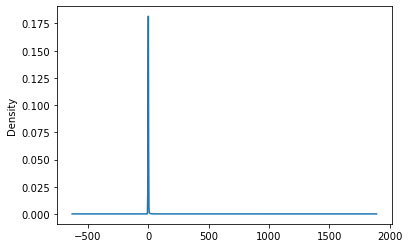

In [7]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than or equal to 5.
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    optimization_df.NAME = optimization_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
optimization_df.NAME.value_counts()

Other                                                              20043
PARENT BOOSTER USA INC                                              1260
TOPS CLUB INC                                                        765
UNITED STATES BOWLING CONGRESS INC                                   700
WASHINGTON STATE UNIVERSITY                                          492
                                                                   ...  
MENNONITE DISASTER SERVICE                                             6
QUAIL FEDERATION INC                                                   6
KIWANIS INTERNATIONAL                                                  6
JACKSONVILLE DISTRICT COUNCIL SOCIETY OF ST VINCENT DE PAUL INC        6
OLD OAK CLIFF CONSERVATION LEAGUE INC                                  6
Name: NAME, Length: 355, dtype: int64

In [9]:
application_counts = optimization_df.APPLICATION_TYPE.value_counts()

# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    optimization_df.APPLICATION_TYPE = optimization_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
optimization_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
classification_counts = optimization_df.CLASSIFICATION.value_counts()

# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_counts[classification_counts < 1000].index)
# Replace in dataframe
for cls in replace_classification:
    optimization_df.CLASSIFICATION = optimization_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
optimization_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
opt_cat = optimization_df.dtypes[optimization_df.dtypes == "object"].index.tolist()
opt_cat 

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list

encode_df = pd.DataFrame(enc.fit_transform(optimization_df[opt_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(opt_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
optimization_df = optimization_df.merge(encode_df,left_index=True, right_index=True)
optimization_df = optimization_df.drop(opt_cat,1)
optimization_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = optimization_df["IS_SUCCESSFUL"].values
X = optimization_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# Optimization attempts 
# hidden_nodes_layer1 =  12
# hidden_nodes_layer2 = 6
# hidden_nodes_layer1 = 50
# hidden_nodes_layer2 = 20
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               39900     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 43,251
Trainable params: 43,251
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("challenge_checkpoints/",exist_ok=True)
checkpoint_path = "challenge_checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath= checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4928 - accuracy: 0.7743
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4426 - accuracy: 0.7954
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.7975
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.7988
Epoch 5/100
768/804 [===========================>..] - ETA: 0s - loss: 0.4270 - accuracy: 0.7986
Epoch 00005: saving model to challenge_checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4265 - accuracy: 0.7991
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.7993
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.7997
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4214 - accuracy: 0.8008: 0s -
Epoch 9/100
804/804 [=============

804/804 [==============================] - 1s 1ms/step - loss: 0.4041 - accuracy: 0.8071
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8072
Epoch 65/100
530/804 [==================>...........] - ETA: 0s - loss: 0.4018 - accuracy: 0.8096
Epoch 00065: saving model to challenge_checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8074
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4029 - accuracy: 0.8067
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4033 - accuracy: 0.8076
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4027 - accuracy: 0.8075
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8070
Epoch 70/100
498/804 [=================>............] - ETA: 0s - loss: 0.4006 - accuracy: 0.8091
Epoch 00070: saving model to challenge_checkpoint

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation.h5")

# Random Forest Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
 # Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest model accuracy: {accuracy_score(y_test,y_pred):.3f}")